# Sect 06:  Visualizations

- onl01-dtsc-pt-041320
- 05/06/20


## Learning Objectives

- Matplotlib is the backbone of plotting in python and used by pandas,seaborn,etc.
    - [Matplotlib Example Gallery](https://matplotlib.org/gallery/index.html#examples-index) 
    - [Seaborn Example Gallery](https://seaborn.pydata.org/examples/index.html)
    - ['Pandas Visualization docs']('https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html')

-  *Matplotlib is powerful but can be a bit confusing at times because of its 2 sets of commands:*
    - the matplotlib.pyplot functions (`plt.bar()`,`plt.title()`)
    - the object_oriented methods (`ax.bar()`,`ax.set_title()`)
    
- The 2 syntaxes can be confusing at first and cause problems & odd results when mixed together.
    - Learn about some of the problems when mixing types.
    - Example: see how plt.title()/plt.xlabel(),etc. can behave strangely in subplots.
    
    - **Bookmark this article, its the best explanation of how matploblib'S 2 interfaces work:**
> ["Artist" in Matplotlib - something I wanted to know before spending tremendous hours on googling how-tos.](https://dev.to/skotaro/artist-in-matplotlib---something-i-wanted-to-know-before-spending-tremendous-hours-on-googling-how-tos--31oo)<br>


    
- Seaborn and Pandas plots can be updated with matplotlib commands's OOP type of commands (`ax.set_title()`)

## Questions/Comments?

### From the Gdoc

___

# Previously on...  *Section 05*

## Activity: Project - Data Cleaning

- [Lesson](https://learn.co/tracks/module-1-data-science-career-2-1/intro-to-data-with-python-and-sql/section-05-data-cleaning-in-pandas/project-data-cleaning)

- [Solution](https://github.com/learn-co-students/dsc-data-cleaning-project-onl01-dtsc-pt-041320/tree/solution)

In [1]:
## NOTEL: I UPDATED PANDAS AND I GET NEW WARNINGS SO IGNORING THEM FOR NOW
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


Bad key "text.kerning_factor" on line 4 in
//anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
heroes_df = pd.read_csv('heroes_information.csv',index_col=0)
powers_df = pd.read_csv('super_hero_powers.csv')
display(heroes_df.head(),powers_df.head())

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,3-D Man,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Abe Sapien,True,True,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Abin Sur,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Abomination,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [3]:
heroes_df.loc[ heroes_df['name'] == 'Goliath']

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
289,Goliath,Male,-,-,-,-99.0,Marvel Comics,-,good,-99.0
290,Goliath,Male,-,Human,-,-99.0,Marvel Comics,-,good,-99.0
291,Goliath,Male,-,Human,-,-99.0,Marvel Comics,-,good,-99.0


In [4]:
heroes_df.drop_duplicates(inplace=True)
heroes_df[heroes_df.duplicated()]

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight


In [5]:
heroes_df.loc[ heroes_df['name'] == 'Goliath']

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
289,Goliath,Male,-,-,-,-99.0,Marvel Comics,-,good,-99.0
290,Goliath,Male,-,Human,-,-99.0,Marvel Comics,-,good,-99.0


In [6]:
heroes_df[heroes_df.duplicated(subset=['name'],keep=False)]

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
22,Angel,Male,blue,-,Blond,183.0,Marvel Comics,-,good,68.0
23,Angel,Male,-,Vampire,-,-99.0,Dark Horse Comics,-,good,-99.0
47,Atlas,Male,brown,Mutant,Red,183.0,Marvel Comics,-,good,101.0
48,Atlas,Male,blue,God / Eternal,Brown,198.0,DC Comics,-,bad,126.0
49,Atom,Male,blue,-,Red,178.0,DC Comics,-,good,68.0
50,Atom,Male,-,-,-,-99.0,DC Comics,-,good,-99.0
62,Batgirl,Female,-,-,-,-99.0,DC Comics,-,good,-99.0
63,Batgirl,Female,green,Human,Red,170.0,DC Comics,-,good,57.0
68,Batman,Male,blue,Human,black,188.0,DC Comics,-,good,95.0
69,Batman,Male,blue,Human,Black,178.0,DC Comics,-,good,77.0


In [7]:
heroes_df.drop_duplicates(subset=['name'],inplace=True)
heroes_df[heroes_df.duplicated(subset=['name'],keep=False)]


,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight


In [8]:
## Placeholders
heroes_df['Gender'].value_counts(dropna=False)

Male      491
Female    196
-          28
Name: Gender, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a2029f048>,
      dtype=object)

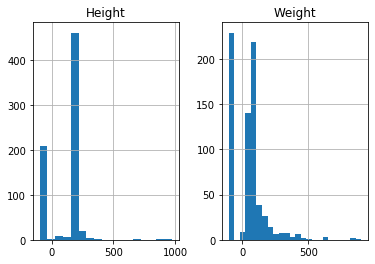

In [9]:
heroes_df.hist(bins='auto')

In [10]:
heroes_df.loc[(heroes_df['Weight']<0)]#,(heroes_df['Weight']<0)]

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0
6,Adam Monroe,Male,blue,-,Blond,-99.0,NBC - Heroes,-,good,-99.0
14,Alex Mercer,Male,-,Human,-,-99.0,Wildstorm,-,bad,-99.0
15,Alex Woolsly,Male,-,-,-,-99.0,NBC - Heroes,-,good,-99.0
18,Allan Quatermain,Male,-,-,-,-99.0,Wildstorm,-,good,-99.0
...,...,...,...,...,...,...,...,...,...,...
712,Weapon XI,Male,-,-,-,-99.0,Marvel Comics,-,bad,-99.0
713,White Canary,Female,brown,Human,Black,-99.0,DC Comics,-,bad,-99.0
715,Wildfire,Male,-,-,-,-99.0,DC Comics,-,good,-99.0
723,Wondra,Female,-,-,-,-99.0,Marvel Comics,-,good,-99.0


In [11]:
str_cols = list(heroes_df.select_dtypes('object').columns)
str_cols

['name',
 'Gender',
 'Eye color',
 'Race',
 'Hair color',
 'Publisher',
 'Skin color',
 'Alignment']

In [12]:
for col in str_cols:
    display(heroes_df[col].value_counts(dropna=False))
    print()

Callisto           1
Utgard-Loki        1
Batgirl VI         1
Sasquatch          1
Paul Blart         1
                  ..
Man-Bat            1
Deadpool           1
Mister Sinister    1
Bizarro            1
Bill Harken        1
Name: name, Length: 715, dtype: int64

Male      491
Female    196
-          28
Name: Gender, dtype: int64

blue                       220
-                          165
brown                      125
green                       71
red                         45
black                       22
yellow                      19
white                       16
hazel                        6
grey                         5
purple                       4
gold                         3
yellow (without irises)      2
violet                       2
amber                        2
yellow / blue                1
green / blue                 1
indigo                       1
blue / white                 1
silver                       1
bown                         1
white / red                  1
yellow / red                 1
Name: Eye color, dtype: int64

-                300
Human            199
Mutant            63
God / Eternal     13
Cyborg            11
                ... 
Strontian          1
Tamaranean         1
Clone              1
Human / Clone      1
Ungaran            1
Name: Race, Length: 62, dtype: int64

-                   166
Black               154
Blond                97
Brown                82
No Hair              75
Red                  49
White                23
Auburn               12
Green                 8
Strawberry Blond      7
Purple                5
Grey                  5
Silver                4
Brown / White         4
Blue                  3
blond                 3
black                 3
Orange                2
Yellow                2
Indigo                1
Red / Orange          1
Magenta               1
Gold                  1
Red / White           1
Brown / Black         1
Pink                  1
Black / Blue          1
Red / Grey            1
Brownn                1
Orange / White        1
Name: Hair color, dtype: int64

Marvel Comics        379
DC Comics            206
NBC - Heroes          19
Dark Horse Comics     17
NaN                   15
George Lucas          14
Image Comics          14
HarperCollins          6
Star Trek              6
SyFy                   5
Team Epic TV           5
ABC Studios            4
IDW Publishing         4
Shueisha               4
Icon Comics            4
Wildstorm              3
Sony Pictures          2
J. R. R. Tolkien       1
J. K. Rowling          1
Universal Studios      1
South Park             1
Hanna-Barbera          1
Titan Books            1
Rebellion              1
Microsoft              1
Name: Publisher, dtype: int64

-                 644
green              21
red                 9
blue                9
white               7
grey                5
silver              5
purple              3
pink                2
gold                2
yellow              2
orange              1
gray                1
blue-white          1
black               1
orange / white      1
red / black         1
Name: Skin color, dtype: int64

good       479
bad        205
neutral     24
-            7
Name: Alignment, dtype: int64

In [13]:
placeholders = ['-',-99.0]
heroes_df.replace(placeholders,np.nan, inplace=True)#.isna().sum()

num_cols = heroes_df.select_dtypes('number').columns
for col in num_cols:
    heroes_df[col] = heroes_df[col].fillna(heroes_df[col].median())
    

heroes_df.isna().sum()/len(heroes_df)*100

name           0.000000
Gender         3.916084
Eye color     23.076923
Race          41.958042
Hair color    23.216783
Height         0.000000
Publisher      2.097902
Skin color    90.069930
Alignment      0.979021
Weight         0.000000
dtype: float64

In [14]:
heroes_df.dropna(subset=['Alignment','Publisher'],inplace=True)
heroes_df.isna().sum()

name            0
Gender         25
Eye color     154
Race          293
Hair color    155
Height          0
Publisher       0
Skin color    625
Alignment       0
Weight          0
dtype: int64

In [15]:
res = heroes_df.isna().sum()#.apply()
res[res>0]#.index

Gender         25
Eye color     154
Race          293
Hair color    155
Skin color    625
dtype: int64

In [16]:
null_cols = res[res>0].index

null_cols

Index(['Gender', 'Eye color', 'Race', 'Hair color', 'Skin color'], dtype='object')

In [17]:
idx = heroes_df['Gender'].isna()
# heroes_df.loc[idx,'Gender'] = "missing"
heroes_df['Gender'].value_counts()

Male      475
Female    194
Name: Gender, dtype: int64

In [18]:
for col in null_cols:
    val_counts = heroes_df[col].value_counts(normalize=True)
    idx = heroes_df[col].isna()
    heroes_df.loc[idx,col] = heroes_df.loc[idx,col].apply(lambda x: np.random.choice(val_counts.index,
                                                           p=val_counts.values))

In [19]:
# heroes_df['Race'].value_counts(normalize=True)

In [20]:
heroes_df.isna().sum()

name          0
Gender        0
Eye color     0
Race          0
Hair color    0
Height        0
Publisher     0
Skin color    0
Alignment     0
Weight        0
dtype: int64

### Joining, Grouping, and Aggregating

In the cell below, join the two DataFrames.  Think about which sort of join you should use, as well as which columns you should join on.  Rename columns and manipulate as needed.  

**_HINT:_** Consider the possibility that the columns you choose to join on contain duplicate entries. If that is the case, devise a strategy to deal with the duplicates.

**_HINT:_** If the join throws an error message, consider setting the column you want to join on as the index for each DataFrame.  

In [21]:
display(heroes_df.head(),powers_df.head())

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,blue,good,441.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,silver,bad,441.0
4,Abraxas,Male,blue,Cosmic Entity,Black,183.0,Marvel Comics,green,bad,81.0


,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,3-D Man,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Abe Sapien,True,True,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Abin Sur,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Abomination,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [22]:
pd.set_option('display.max_columns',0)

df = pd.merge(heroes_df, powers_df, left_on='name', right_on='hero_names')
df.head()

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,Danger Sense,Underwater breathing,Marksmanship,Weapons Master,Power Augmentation,Animal Attributes,Longevity,Intelligence,Super Strength,Cryokinesis,Telepathy,Energy Armor,Energy Blasts,Duplication,Size Changing,Density Control,Stamina,Astral Travel,Audio Control,...,Plant Control,Sonar,Sonic Scream,Time Manipulation,Enhanced Touch,Magic Resistance,Invisibility,Sub-Mariner,Radiation Absorption,Intuitive aptitude,Vision - Microscopic,Melting,Wind Control,Super Breath,Wallcrawling,Vision - Night,Vision - Infrared,Grim Reaping,Matter Absorption,The Force,Resurrection,Terrakinesis,Vision - Heat,Vitakinesis,Radar Sense,Qwardian Power Ring,Weather Control,Vision - X-Ray,Vision - Thermal,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,blue,good,441.0,A-Bomb,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0,Abe Sapien,True,True,False,False,True,True,False,False,False,False,True,True,True,False,False,True,True,True,False,True,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0,Abin Sur,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,silver,bad,441.0,Abomination,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,Abraxas,Male,blue,Cosmic Entity,Black,183.0,Marvel Comics,green,bad,81.0,Abraxas,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In the cell below, subset male and female heroes into different dataframes.  Create a scatterplot of the height and weight of each hero, with weight as the y-axis.  Plot both the male and female heroes subset into each dataframe, and make the color for each point in the scatterplot correspond to the gender of the superhero.

In [23]:
male_heroes_df = df.groupby('Gender').get_group('Male')
female_heroes_df = df.groupby('Gender').get_group('Female')

display(male_heroes_df.head(),female_heroes_df.head())

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,Danger Sense,Underwater breathing,Marksmanship,Weapons Master,Power Augmentation,Animal Attributes,Longevity,Intelligence,Super Strength,Cryokinesis,Telepathy,Energy Armor,Energy Blasts,Duplication,Size Changing,Density Control,Stamina,Astral Travel,Audio Control,...,Plant Control,Sonar,Sonic Scream,Time Manipulation,Enhanced Touch,Magic Resistance,Invisibility,Sub-Mariner,Radiation Absorption,Intuitive aptitude,Vision - Microscopic,Melting,Wind Control,Super Breath,Wallcrawling,Vision - Night,Vision - Infrared,Grim Reaping,Matter Absorption,The Force,Resurrection,Terrakinesis,Vision - Heat,Vitakinesis,Radar Sense,Qwardian Power Ring,Weather Control,Vision - X-Ray,Vision - Thermal,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,blue,good,441.0,A-Bomb,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0,Abe Sapien,True,True,False,False,True,True,False,False,False,False,True,True,True,False,False,True,True,True,False,True,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0,Abin Sur,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,silver,bad,441.0,Abomination,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,Abraxas,Male,blue,Cosmic Entity,Black,183.0,Marvel Comics,green,bad,81.0,Abraxas,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,Danger Sense,Underwater breathing,Marksmanship,Weapons Master,Power Augmentation,Animal Attributes,Longevity,Intelligence,Super Strength,Cryokinesis,Telepathy,Energy Armor,Energy Blasts,Duplication,Size Changing,Density Control,Stamina,Astral Travel,Audio Control,...,Plant Control,Sonar,Sonic Scream,Time Manipulation,Enhanced Touch,Magic Resistance,Invisibility,Sub-Mariner,Radiation Absorption,Intuitive aptitude,Vision - Microscopic,Melting,Wind Control,Super Breath,Wallcrawling,Vision - Night,Vision - Infrared,Grim Reaping,Matter Absorption,The Force,Resurrection,Terrakinesis,Vision - Heat,Vitakinesis,Radar Sense,Qwardian Power Ring,Weather Control,Vision - X-Ray,Vision - Thermal,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
21,Angel Dust,Female,yellow,Mutant,Black,165.0,Marvel Comics,white,good,57.0,Angel Dust,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
22,Angel Salvadore,Female,brown,Human,Black,163.0,Marvel Comics,blue,good,54.0,Angel Salvadore,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
23,Angela,Female,gold,Human,Black / Blue,183.0,Image Comics,gold,bad,81.0,Angela,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
34,Arachne,Female,blue,Human,Blond,175.0,Marvel Comics,yellow,good,63.0,Arachne,True,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
36,Arclight,Female,violet,Human,Purple,173.0,Marvel Comics,silver,bad,57.0,Arclight,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


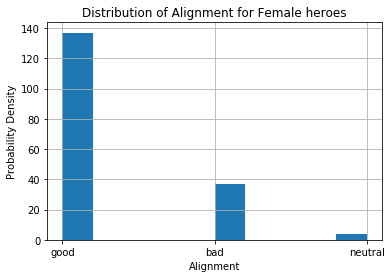

In [24]:
## Solution
def show_distplot(dataframe, gender, column_name):
    plt.plot()
    dataframe[column_name].hist()
    plt.title('Distribution of {} for {} heroes'.format(column_name, gender))
    plt.xlabel(column_name)
    plt.ylabel('Probability Density')
    plt.show()
    
show_distplot(female_heroes_df,'Female','Alignment')

In [25]:
# df.groupby('Gender')['Alignment'].apply(lambda x: x.value_counts(normalize=True))#.plot(kind='barh')

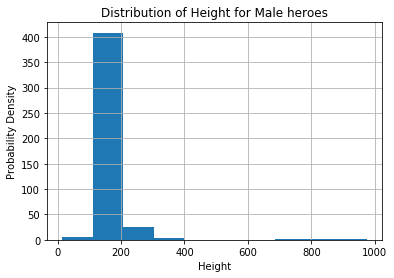

In [26]:
# Male Height
show_distplot(male_heroes_df,'Male','Height')

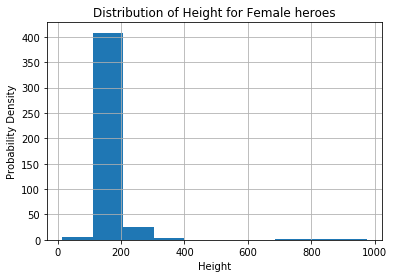

In [27]:
# Female Height
show_distplot(male_heroes_df,'Female','Height')

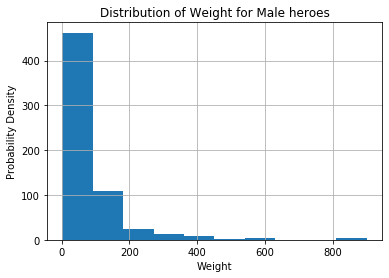

In [28]:
# Male Weight
show_distplot(df,'Male','Weight')

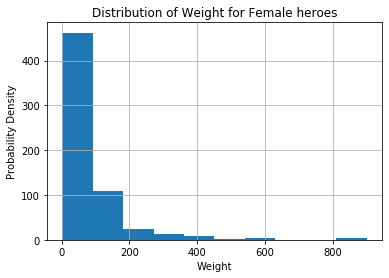

In [29]:
show_distplot(df,'Female','Weight')

___

# NEW - Sect 06:  Visualizations

- Let's remake our plot_dist function using seaborn
- Let's use our complete dataframe and filter our the groups inside our function
- Let's return the fig and ax objects so we can continue to edit the figure

Later:

- Let's use `pd.plotting.table` to add the descriptive stats for our comparison

In [30]:
import seaborn as sns

def plot_heroes(df, group_col, group_to_plot, plot_col):
    
    group_df = df.groupby(group_col).get_group(group_to_plot)
  
    fig,ax = plt.subplots()
    
    sns.distplot(group_df[plot_col],kde=False,ax=ax)
    
    ax.set_title(f"Grouped by {group_col}: {group_to_plot}")
    return fig,ax

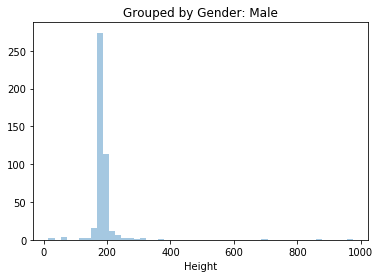

In [31]:
fig,ax = plot_heroes(df, 'Gender','Male','Height')

> Discuss your findings from the plots above, with respect to the distribution of height and weight by gender.  Your explanation should include a discussion of any relevant summary statistics, including mean, median, mode, and the overall shape of each distribution.  

Write your answer below this line:
____________________________________________________________________________________________________________________________



In [65]:
stats = male_heroes_df['Height'].describe().round(2)
stats

count    446.00
mean     190.42
std       60.97
min       15.20
25%      183.00
50%      183.00
75%      188.00
max      975.00
Name: Height, dtype: float64

In [66]:
plt.style.use('seaborn-notebook')
pd.set_option('display.precision',2)

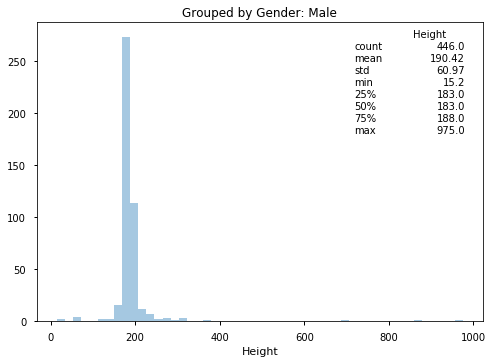

In [73]:
fig,ax = plot_heroes(df, 'Gender','Male','Height')



In [80]:
import seaborn as sns

def plot_heroes_stats(df, group_col, group_to_plot, plot_col):
    
    group_df = df.groupby(group_col).get_group(group_to_plot)
    
    stats = group_df[plot_col].describe().round(2)
    stats.name = f"{stats.name} - {group_to_plot}"

    fig,ax = plt.subplots()
    sns.distplot(group_df[plot_col],kde=False,ax=ax)
    table= pd.plotting.table(ax=ax, data=stats,loc='upper right',colWidths=[0.2],
                        edges='open')    
    ax.set_title(f"Grouped by {group_col}: {group_to_plot}")
    return fig,ax

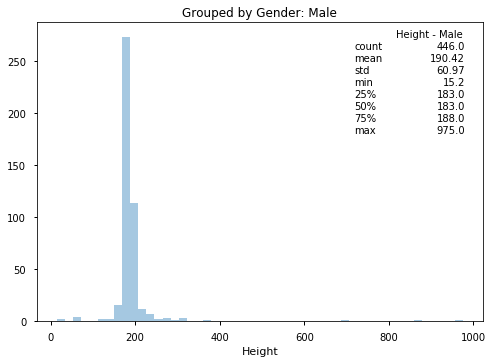

In [81]:
plot_heroes_stats(df,'Gender','Male','Height');

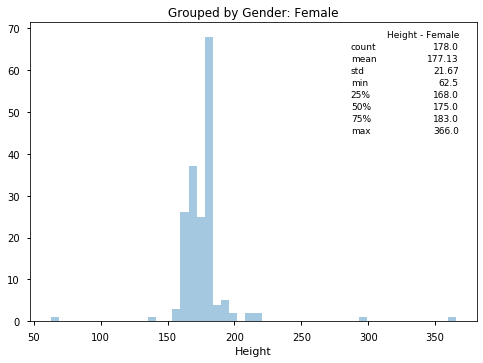

In [82]:
plot_heroes_stats(df,'Gender','Female','Height');

### Sample Question: Most Common Powers

The rest of this notebook will be left to you to investigate the dataset by formulating your own questions, and then seeking answers using pandas and numpy.  Every answer should include some sort of visualization, when appropriate. Before moving on to formulating your own questions, use the dataset to answer the following questions about superhero powers:

* What are the 5 most common powers overall?
* What are the 5 most common powers in the Marvel Universe?
* What are the 5 most common powers in the DC Universe?

In [84]:
power_cols = powers_df.drop(columns=['hero_names']).columns
power_cols

Index(['Agility', 'Accelerated Healing', 'Lantern Power Ring',
       'Dimensional Awareness', 'Cold Resistance', 'Durability', 'Stealth',
       'Energy Absorption', 'Flight', 'Danger Sense',
       ...
       'Web Creation', 'Reality Warping', 'Odin Force', 'Symbiote Costume',
       'Speed Force', 'Phoenix Force', 'Molecular Dissipation',
       'Vision - Cryo', 'Omnipresent', 'Omniscient'],
      dtype='object', length=167)

In [85]:
power_counts = df[power_cols].sum(axis=0)
power_counts

Agility                  226
Accelerated Healing      171
Lantern Power Ring        11
Dimensional Awareness     22
Cold Resistance           47
                        ... 
Phoenix Force              1
Molecular Dissipation      1
Vision - Cryo              1
Omnipresent                1
Omniscient                 1
Length: 167, dtype: int64

In [86]:
top_10 = power_counts.sort_values(ascending=False).head(10)#.plot(kind='bar')
top_10

Super Strength         341
Stamina                271
Durability             242
Super Speed            236
Agility                226
Flight                 203
Accelerated Healing    171
Reflexes               156
Intelligence           148
Energy Blasts          141
dtype: int64

# Matplotlib.pyplot 

- https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.html
- Pyplot figures don't need to be created first. You can just call one of the plotting functions `plt.bar/plot/scatter/etc`
- Any `plt` commands entered in the same cell will happen on the same plot.

```python
import matplotlib.pyplot as plt
plt.plot(x,y)
plt.hist(x)
plt.scatter(x,y)
plt.bar(x, height) #x= group/label, height = bar height/ y

```

- BUT if you want to specify figsize, you have to you create the figure first with `plt.figure(figsize=(W,H))` where width and height are numbers.

```python
fig = plt.figure(figsize=(10,5))
plt.plot(x,y)
```

Text(0.5, 1.0, 'Most Common Super Powers')

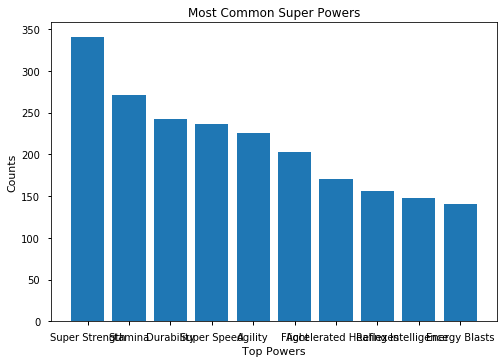

In [89]:
plt.bar(top_10.index,top_10.values)
plt.ylabel('Counts')
plt.xlabel('Top Powers')
plt.title('Most Common Super Powers')

## Matplotlib's Object-Oriented Interface
- Create new figures by using `fig,ax=plt.subplots()` to create a figure _first_
    - If do not specify `nrows` or `ncols` it produces one ax inside the figure.
    
    - If you create subplots by passing it more rows or columns, then ax becomes a *list* of the axes.
    `fig, axes = plt.subplots(ncols=2)`
    
- Plotting commands are then called directly by the `ax` as a method.
i.e. `ax.plot()`

- Adding text and styling is done via a different set of commands, which are also called directly by the `ax`, and start with `.set_`
- The command for setting the title changes from `plt.title` to `ax.set_title()`
- `ax.set_ylabel()`
- etc.

[Text(0, 0.5, 'Counts'),
 Text(0.5, 0, 'Top Powers'),
 Text(0.5, 1.0, 'Most Common Super Powers')]

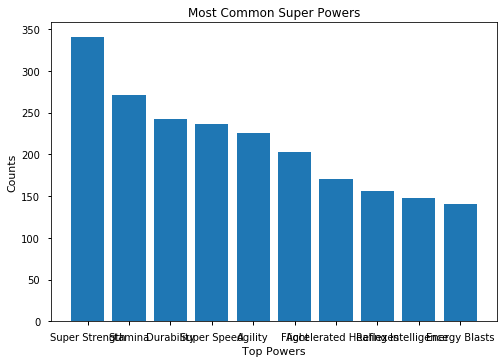

In [95]:
fig,ax = plt.subplots()
ax.bar(top_10.index,top_10.values)
ax.set(ylabel='Counts', xlabel='Top Powers',title = 'Most Common Super Powers')

## Pandas & Seaborn




- *Matplotlib is the backbone of plotting in python.*<br> 
- Many packages ( `statsmodels`,`seaborn`,`pandas`,`plotly`) use a matplotlib backbone to make complex and aesthetically pleasing visuals.<br>
    - i.e. pandas `df.plot()/df.scatter()` are using matplotlib's .plot(), .scatter(), but wrapped 
    - i.e. seaborn's sns.regplot() is a matplotlib plt.scatter() and a plt.plot() line


[Text(0, 0.5, 'Counts'),
 Text(0.5, 0, 'Top Powers'),
 Text(0.5, 1.0, 'Most Common Super Powers')]

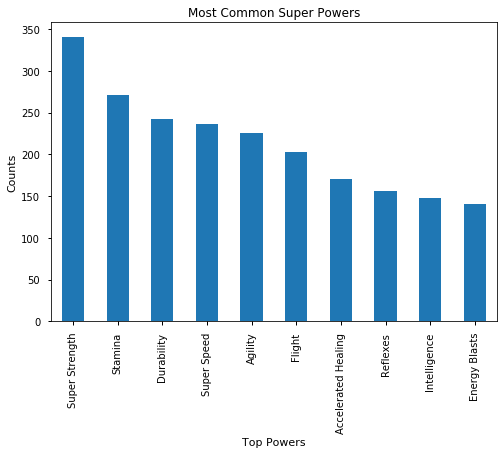

In [96]:
ax = top_10.plot(kind='bar')
ax.set(ylabel='Counts', xlabel='Top Powers',title = 'Most Common Super Powers')

In [106]:
top_10df = top_10.to_frame()
top_10df.reset_index(inplace=True)
top_10df.columns = ['Power','Count']
top_10df

,Power,Count
0,Super Strength,341
1,Stamina,271
2,Durability,242
3,Super Speed,236
4,Agility,226
5,Flight,203
6,Accelerated Healing,171
7,Reflexes,156
8,Intelligence,148
9,Energy Blasts,141


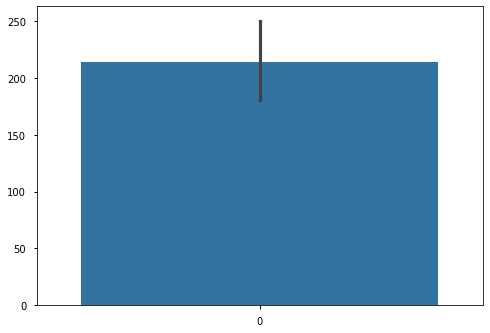

In [98]:
sns.barplot(data=top_10df,y)

In [97]:
# fig,ax=plt.subplots(ncols=2)

# df[power_cols].sum(axis=0).sort_values(ascending=True).tail(n).plot(kind='barh',
#                                                                    ax=ax[0]);
# test = df[power_cols].sum(axis=0).sort_values(ascending=True).tail(n).plot(kind='barh',
#                                                                    ax=ax[0]);
# test

In [ ]:
plot_top_powers(df,power_cols)

### OOP Matplotlib + Pandas

In [ ]:
n = 10
ax = power_counts.sort_values(ascending=False).head(n).plot(kind='bar')
ax.set(xlabel='Counts',ylabel='Power',
       title=f'Top {n} Most Common Powers')

- We can customize the text properties for our labels using the `fontdict` parameter in our text/labeling functiopns 

    - font_dict is a dictionary with a keyword that specifies what property to change and a value for that property
    - [See this link for available properties](https://matplotlib.org/3.1.1/tutorials/text/text_props.html?highlight=text)

In [ ]:
## Fixing and customizing fonts
ax.set_title(ax.get_title(),fontdict=dict(family='serif'))
fig = ax.get_figure()
fig.set_size_inches((12,4))
ax.set_xticklabels(ax.get_xticklabels(),fontdict=dict(rotation=45),
                  ha='right')

fig

- Changing colors.
    - Matplotlib recognized many colors by name. [See this list for all named colors.](https://matplotlib.org/3.1.0/gallery/color/named_colors.html)
    - Use the `c=` parameter to specify color

In [ ]:
df['Publisher'].value_counts(ascending=False,normalize=True).plot('barh')

Analyze the results you found above to answer the following question:

How do the top 5 powers in the Marvel and DC universes compare?  Are they similar, or are there significant differences? How do they compare to the overall trends in the entire Superheroes dataset?

Write your answer below this line:
____________________________________________________________________________________________________________________________

In [ ]:
fig,ax = plt.subplots(ncols = 2)


In [ ]:
def plot_top_powers_by_group(df, power_cols,n = 10,  group_col= None,
                             group=None, ax=None, ):
        
    if group_col is None:
        power_counts = df[power_cols].sum(axis=0)
    else:
        power_counts = df.groupby(group_col).get_group(group)[power_cols].sum(axis=0)
        
        
    ax = power_counts.sort_values(ascending=True).tail(n).plot(kind='barh',ax=ax)
    ax.set(xlabel='Counts',ylabel=f'Top {n} Powers',
           title=f'Most Common Powers: {group_col} =  {group}')
    return ax.get_figure(),ax

In [ ]:
fig,ax=plt.subplots(ncols=2,figsize=(10,4))
f,a= plot_top_powers_by_group(df,power_cols,10,'Publisher','Marvel Comics',ax=ax[0])
f,a= plot_top_powers_by_group(df,power_cols,10,'Publisher','DC Comics',ax=ax[1])
plt.tight_layout()


## Matplotlib Styles

You can specify a style sheet for pandas, which will change the default visual style for all plots. 
- **[Visit the gallery for a preview of the styles available.](https://tonysyu.github.io/raw_content/matplotlib-style-gallery/gallery.html)**


```python
import matplotlib.pyplot as plt
plt.style.use('style-name')
```

Use a context` block to apply a style to that figure only:
```python
with plt.style.context('style-name'):
    plt.plot()
```

In [ ]:
style_names = plt.style.available

print("[i] Available matplotlib styles:")
[print('\t',x) for x in style_names];

In [ ]:
len(style_names)//2

In [ ]:
# Loop through style names
for style in style_names:
    
    # Use context manager to apply style to ONLY this figure
    with plt.style.context(style):
        fig,ax = plot_heroes(df,'Gender','Male','Height')
        ax.set_ylabel(ax.get_title())
        ax.set_title(f"Style: '{style}'")

In [ ]:
# Female Weight
plt.style.use('ggplot')
plot_heroes(df,'Gender','Female','Weight')

### Your Own Investigation

For the remainder of this lab, you'll be focusing on coming up with and answering your own question, just like we did above.  Your question should not be overly simple, and should require both descriptive statistics and data visualization to answer.  In case you're unsure of what questions to ask, some sample questions have been provided below.

Pick one of the following questions to investigate and answer, or come up with one of your own!

* Which powers have the highest chance of co-occurring in a hero (e.g. super strength and flight), and does this differ by gender?
* Is there a relationship between a hero's height and weight and their powerset?
* What is the distribution of skin colors amongst alien heroes?

Explain your question below this line:
____________________________________________________________________________________________________________________________



Some sample cells have been provided to give you room to work. If you need to create more cells, you can do this easily by:

1. Highlighting a cell and then pressing `esc` to enter command mode.
1. Pressing `b` to add a cell below the currently highlighted cell, or `a` to add one above it.  

Be sure to include thoughtful, well-labeled visualizations to back up your analysis!

## Summary

In this lab, we demonstrated our mastery of:
* Using all of our Pandas knowledge to date to clean the dataset and deal with null values
* Using Queries and aggregations to group the data into interesting subsets as needed
* Using descriptive statistics and data visualization to find answers to questions we may have about the data